In [81]:
import os
import sys
import pandas as pd
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
from scipy import stats
import json
from scipy.stats import linregress
import math


In [82]:


name = 'PercentgRNACollidedwCas12vsTime'
output_path = f'C:/Users/jlesinski/Desktop/Biochemistry/biochemgraphs/insitu_Figures/{name}.eps'

# ### file name stuff ### - Time vs. Concentration
# time_vs_conc_graphname = 'Time vs. Concentration'
# output_path = f'C:/Users/jlesinski/Desktop/Biochemistry/biochemgraphs/holmes'+time_vs_conc_graphname+'.jpg'

In [83]:
### Functions ###
def repeat_list(l,repeats):
    new_list = []
    for i in l:
        new_list.append([i]*repeats)
    return new_list

In [84]:
### Constants ###
kB = 1.380649E-23
T = 273+37 # in Kelvin
Na = 6.022E23 # Avogadro's number


# viscosity = 0.0006527 # viscosity of water - [Pa*s] ***maybe these unit***
# viscosity = (0.267*4)/10 # viscosity of HOLMES 1x - [Pa*s] ***maybe these unit***
viscosity = 5.127979999999999 # viscosity of 5% PEG in water - [Pa*s] ***maybe these unit***
rxn_vol = 25 # reaction volume - [L]


R =  3.7E-9 # radius of collision cross section - radius of Cas12a - [m]
# Dc = 50E-12 #diffusion coefficient of Cas12a - [m^2/s] ***of AsCas12a no LbCas12a and the RNP not gRNA alone***
# Dg = 5E-11 #diffusion coefficient of gRNA - [m^2/s]


Rc = 3.7E-9 # radius of Cas12a - [m]
N = 41 # number of nucleotides in gRNA
Rg = (5E-10)*N**0.38 # radius of gRNA - [m]
# Dc = kB*T/(6*np.pi*viscosity*Rc) #diffusion coefficient of Cas12a - [m^2/s]
# Dg = kB*T/(6*np.pi*viscosity*Rg) #diffusion coefficient of gRNA - [m^2/s]
# Dc = 47.02E-12 #diffusion coefficient of Cas12a - [m^2/s]
# Dg = 16.7E-12 #diffusion coefficient of gRNA - [m^2/s]


### RPA ###
Dc = (47.02E-12)*(310/294) #diffusion coefficient of Cas12a - [m^2/s]
Dg = (16.7E-12)*(310/294) #diffusion coefficient of gRNA - [m^2/s]
plus_minus_Dc = 2.7E-12
plus_minus_Dg = 2.14E-12

## Holmes 1x ###
Dc_H = (91.82E-12)*(310/294) #diffusion coefficient of Cas12a - [m^2/s]
Dg_H = (14.75E-12)*(310/294) #diffusion coefficient of gRNA - [m^2/s]
plus_minus_Dc_H = 2.88E-12
plus_minus_Dg_H = 0.46E-12


delta_Dr = np.sqrt(plus_minus_Dc**2+plus_minus_Dg**2)
delta_Dr_H = np.sqrt(plus_minus_Dc_H**2+plus_minus_Dg_H**2)


### Variables ###
Cc = 25E-9 # concentration of Cas12a - [mol/L]
Cg = 25E-9 # concentration of gRNA - [mol/L]
No = 1 # initial % of unbound complexes - [%RNPs formed]
time = np.linspace(1, 50*10, 50*10) # time - [s]
time = list(time)


### Equations ###
Dr = Dc + Dg
Dr_H = Dc_H + Dg_H


# smol_fudge_factor = 100
# Z = smol_fudge_factor*1000*Na*4*np.pi*R*Dr*Cc*Cg #collision frequency (absolute) - [mole collisions/(s*L)]
Z = 1000*Na*4*(np.pi)*R*Dr*Cc*Cg #collision frequency (absolute) - [mole collisions/(s*L)]

# Z = 4*n.pi*R*Dr*Cc*Cg #collision frequency - [1/s in m^3]

In [85]:
####### Second order exponential decay ######## - discrete solution
# exp_array = [] # current % of unbound complexes - [%RNPs formed]
# Cnew = 0
# for t in time:
#     lambda_expconst = -1000*Na*4*(np.pi)*R*Dr*(Cc-Cnew) -1000*Na*4*(np.pi)*R*Dr*(Cc-Cnew)
#     Nt = No*(math.exp(lambda_expconst*t))
#     out = 1-Nt # current % of bound complexes - [%RNPs formed]
#     exp_array.append(out)
#     Cnew = Cc-Cc*out
# exp_array = np.array(exp_array)
# Nt = exp_array # current % of unbound complexes - [%RNPs formed]
# Nt = (Nt/No)*100



# ### from Chen 2022 ###
# exp_arraychen = [] # current % of unbound complexes - [%RNPs formed]
# Cnew = 0
# for t in time:
#     lambda_expconstchen = -1*((1000*Na)**(4/3))*8*((np.pi)**-1)*A*Beta*Dr*((Cc)**(1/3))*(Cc-Cnew)+ -1*(((1000*Na)**(4/3))*8*((np.pi)**-1)*A*Beta*Dr*((Cc)**(1/3))*(Cc-Cnew))
#     Ntchen = No*(math.exp(lambda_expconstchen*t))
#     out = 1-Ntchen # current % of bound complexes - [%RNPs formed]
#     exp_arraychen.append(out)
#     Cnew = Cc-Cc*out
# exp_arraychen = np.array(exp_arraychen)
# Ntchen = exp_arraychen # current % of unbound complexes - [%RNPs formed]
# Ntchen = (Ntchen/No)*100

### from Chen 2022 ### - signle order exponential decay
# A = np.pi*R**2
# Beta = 1
# Zchen = ((1000*Na)**(4/3))*8*((np.pi)**-1)*A*Beta*Dr*((Cc+Cg)**(1/3))*(Cc*Cg)
# lambda_expconstchen = -Zchen
# exp_arraychen = np.array([math.exp(lambda_expconstchen*t) for t in time]) # current % of unbound complexes - [%RNPs formed]
# Ntchen = No*exp_arraychen # current % of unbound complexes - [%RNPs formed]

### Preparing data for plotting ###
# df = pd.DataFrame({'Time': time, 'Percent Uncomplexed': Nt, 'Percent Uncomplexed Chen': Ntchen})

In [86]:
####### Stepwise ######## - discrete solution
# Ct_less1 = 0 # current concentration of unbound complexes - [mol/L]
# Z = Z/(Cc*Cg)
# percent_complexed = []
# delta_t = time[1]-time[0]
# # Zt_vector = []
# for t in range(len(time)):
#     if t == 0:
#         Zt = 0
#         # Zt_vector.append(Zt)
#         C_delta_t = Zt*delta_t
#         Ct_less1 = Ct_less1 + C_delta_t
#         percent_complexed.append((Ct_less1/Cc)*100)
#     else:
#         Zt = Z*(Cc-Ct_less1)*(Cg-Ct_less1)
#         # Zt_vector.append(Zt)
#         C_delta_t = Zt*delta_t
#         Ct_less1 = Ct_less1 + C_delta_t
#         percent_complexed.append((Ct_less1/Cc)*100)

A = np.pi*R**2
Beta = (21/41)
Zchen = ((1000*Na)**(4/3))*8*((np.pi)**-1)*A*Beta*Dr*((Cc+Cg)**(1/3))*(Cc*Cg)
Ct_less1 = 0 # current concentration of unbound complexes - [mol/L]
Ct_less1_delta = 0 # current concentration of unbound complexes - [mol/L]
Zchen = Zchen/(((Cc+Cg)**(1/3))*(Cc*Cg))

## error calculation ##
Zchen_delta = ((1000*Na)**(4/3))*8*((np.pi)**-1)*A*Beta*(delta_Dr)*((Cc+Cg)**(1/3))*(Cc*Cg)
Zchen_delta = Zchen_delta/(((Cc+Cg)**(1/3))*(Cc*Cg))


percent_complexed_chen = []
percent_complexed_chen_delta = []
delta_t = time[1]-time[0]
Zt_vector_chen = []
for t in range(len(time)):
    if t == 0:
        Zt = 0
        Zt_chen_leo = 0
        Zt_vector_chen.append(Zt_chen_leo)
        C_delta_t = Zt
        Ct_less1 = Ct_less1 + C_delta_t
        percent_complexed_chen.append((Ct_less1/Cc)*100)
        ## delta ##
        Zt_delta = 0
        C_delta_t_delta = Zt_delta*delta_t
        Ct_less1_delta = Ct_less1_delta + C_delta_t_delta
        percent_complexed_chen_delta.append((Ct_less1_delta/Cc)*100)
    else:
        Zt = Zchen*(((Cc-Ct_less1)+(Cg-Ct_less1))**(1/3))*(Cc-Ct_less1)*(Cg-Ct_less1)
        Zt_chen_leo = Zchen
        Zt_vector_chen.append(Zt_chen_leo)
        Zt_delta = Zchen_delta*(((Cc-Ct_less1)+(Cg-Ct_less1))**(1/3))*(Cc-Ct_less1)*(Cg-Ct_less1)
        ## regular ##
        C_delta_t = Zt
        Ct_less1 = Ct_less1 + C_delta_t
        percent_complexed_chen.append((Ct_less1/Cc)*100)
        ## delta ##
        C_delta_t_delta = Zt_delta*delta_t
        Ct_less1_delta = Ct_less1_delta + C_delta_t_delta
        percent_complexed_chen_delta.append((Ct_less1_delta/Cc)*100)
        # print('this is Zt: '+str(Zt), 'this is Zt_delta: '+str(Zt_delta))
        # print('this is Zt: '+str(Zt), 'this is Zt_delta: '+str(Zt_delta))


### export df to csv ###
# dfout = pd.DataFrame({'Time': time, 'Zab_chen': Zt_vector_chen})
# dfout.to_csv('C:/Users/jlesinski/Desktop/Biochemistry/biochemgraphs/ZabT.csv', index=False)
# df = df.assign(Percent_Complexed_Discrete = percent_complexed)
# df = df.assign(Percent_Complexed_Discrete_chen = percent_complexed_chen)


In [87]:
### Constants ###
kB = 1.380649E-23
T = 273+37 # in Kelvin
Na = 6.022E23 # Avogadro's number


# viscosity = 0.0006527 # viscosity of water - [Pa*s] ***maybe these unit***
# viscosity = (0.267*4)/10 # viscosity of HOLMES 1x - [Pa*s] ***maybe these unit***
viscosity = 5.127979999999999 # viscosity of 5% PEG in water - [Pa*s] ***maybe these unit***
rxn_vol = 25 # reaction volume - [L]


R =  3.7E-9 # radius of collision cross section - radius of Cas12a - [m]
# Dc = 50E-12 #diffusion coefficient of Cas12a - [m^2/s] ***of AsCas12a no LbCas12a and the RNP not gRNA alone***
# Dg = 5E-11 #diffusion coefficient of gRNA - [m^2/s]


Rc = 3.7E-9 # radius of Cas12a - [m]
N = 41 # number of nucleotides in gRNA
Rg = (5E-10)*N**0.38 # radius of gRNA - [m]
# Dc = kB*T/(6*np.pi*viscosity*Rc) #diffusion coefficient of Cas12a - [m^2/s]
# Dg = kB*T/(6*np.pi*viscosity*Rg) #diffusion coefficient of gRNA - [m^2/s]
# Dc = 47.02E-12 #diffusion coefficient of Cas12a - [m^2/s]
# Dg = 16.7E-12 #diffusion coefficient of gRNA - [m^2/s]


### RPA ###
Dc = (47.02E-12)*(310/294) #diffusion coefficient of Cas12a - [m^2/s]
Dg = (16.7E-12)*(310/294) #diffusion coefficient of gRNA - [m^2/s]
plus_minus_Dc = 2.7E-12
plus_minus_Dg = 2.14E-12

## Holmes 1x ###
Dc_H = (91.82E-12)*(310/294) #diffusion coefficient of Cas12a - [m^2/s]
Dg_H = (14.75E-12)*(310/294) #diffusion coefficient of gRNA - [m^2/s]
plus_minus_Dc_H = 2.88E-12
plus_minus_Dg_H = 0.46E-12


delta_Dr = np.sqrt(plus_minus_Dc**2+plus_minus_Dg**2)
delta_Dr_H = np.sqrt(plus_minus_Dc_H**2+plus_minus_Dg_H**2)


### Variables ###
Cc = 25E-9 # concentration of Cas12a - [mol/L]
Cg = 25E-9 # concentration of gRNA - [mol/L]
No = 1 # initial % of unbound complexes - [%RNPs formed]
time = np.linspace(1, 50*10, 50*10) # time - [s]
time = list(time)


### Equations ###
Dr = Dc + Dg
Dr_H = Dc_H + Dg_H


# smol_fudge_factor = 100
# Z = smol_fudge_factor*1000*Na*4*np.pi*R*Dr*Cc*Cg #collision frequency (absolute) - [mole collisions/(s*L)]
Z = 1000*Na*4*(np.pi)*R*Dr*Cc*Cg #collision frequency (absolute) - [mole collisions/(s*L)]

# Z = 4*n.pi*R*Dr*Cc*Cg #collision frequency - [1/s in m^3]

In [88]:
### General ###
A = np.pi*R**2
Beta = (21/41)



### Holmes 1x ###
Z_H = ((1000*Na)**(4/3))*8*((np.pi)**-1)*A*Beta*Dr_H*((Cc+Cg)**(1/3))*(Cc*Cg)
Z_H = Z_H/(((Cc+Cg)**(1/3))*(Cc*Cg))
Ct_less1_H = 0 # current concentration of unbound complexes - [mol/L]
Ct_less1_delta_H = 0 # current concentration of unbound complexes - [mol/L]

## error calculation ##
Zchen_delta_H = ((1000*Na)**(4/3))*8*((np.pi)**-1)*A*Beta*(delta_Dr_H)*((Cc+Cg)**(1/3))*(Cc*Cg)
Zchen_delta_H = Zchen_delta_H/(((Cc+Cg)**(1/3))*(Cc*Cg))

percent_complexed_chen_H = []
percent_complexed_chen_delta_H = []
delta_t = time[1]-time[0]
Zt_vector_chen_H = []
for t in range(len(time)):
    if t == 0:
        Zt_H = 0
        Zt_chen_leo_H = 0
        Zt_vector_chen_H.append(Zt_chen_leo_H)
        C_delta_t_H = Zt_H*delta_t
        Ct_less1_H = Ct_less1_H + C_delta_t_H
        percent_complexed_chen_H.append((Ct_less1_H/Cc)*100)
        ## delta ##
        Zt_delta_H = 0
        C_delta_t_delta_H = Zt_delta_H*delta_t
        Ct_less1_delta_H = Ct_less1_delta_H + C_delta_t_delta_H
        percent_complexed_chen_delta_H.append((Ct_less1_delta_H/Cc)*100)
    else:
        Zt_H = Z_H*(((Cc-Ct_less1_H)+(Cg-Ct_less1_H))**(1/3))*(Cc-Ct_less1_H)*(Cg-Ct_less1_H)
        Zt_chen_leo_H = Z_H
        Zt_vector_chen_H.append(Zt_chen_leo_H)
        Zt_delta_H = Zchen_delta_H*(((Cc-Ct_less1_H)+(Cg-Ct_less1_H))**(1/3))*(Cc-Ct_less1_H)*(Cg-Ct_less1_H)
        ## regular ##
        C_delta_t_H = Zt_H*delta_t
        Ct_less1_H = Ct_less1_H + C_delta_t_H
        percent_complexed_chen_H.append((Ct_less1_H/Cc)*100)
        ## delta ##
        C_delta_t_delta_H = Zt_delta_H*delta_t
        Ct_less1_delta_H = Ct_less1_delta_H + C_delta_t_delta_H
        percent_complexed_chen_delta_H.append((Ct_less1_delta_H/Cc)*100)
        # print('this is Zt: '+str(Zt), 'this is Zt_delta: '+str(Zt_delta))
        # print('this is Zt: '+str(Zt), 'this is Zt_delta: '+str(Zt_delta))


### Preparing data for plotting ###
df = pd.DataFrame({'Time': time, 'Percent_Complexed_Chen': percent_complexed_chen, 'Percent_Complexed_Chen_Delta': percent_complexed_chen_delta, 'Percent_Complexed_Chen_H': percent_complexed_chen_H, 'Percent_Complexed_Chen_Delta_H': percent_complexed_chen_delta_H})


In [89]:
# ### Calculation  ### - collision in reaction
# ZinRxn = Z*(rxn_vol) #collision frequency in reaction - [mole collisions/s]


# ### Calculation  ### -  % collided per time (absolute)
# Zab = Z/


# plot shit

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


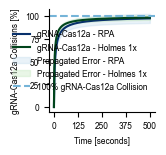

In [90]:
### Plot that shit ###
fig = plt.figure()
# ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(111)
# ax3 = fig.add_subplot(223)
# ax4 = fig.add_subplot(224)
# # ax5 = fig.add_subplot(325)
# # ax6 = fig.add_subplot(236)


# sns.lineplot(data=df,
#             x='Time',
#             y='Percent Uncomplexed',
#             ax=ax1)
#             # label = column

# ax1.ticklabel_format(useOffset=False)
# ax1.set_xlabel('Time [s]',fontsize = xy_label_fontS)
# ax1.set_ylabel('% UNcomplexed',fontsize = xy_label_fontS)
# ax1.legend(fontsize = 5)
# ax1.set_title('Smolchowski',fontsize = 7)
# # ax1.set_yticks(np.arange(0,10000,1000))
# ax1.tick_params(labelsize=5)



# sns.lineplot(data=df,
#             x='Time',
#             y='Percent Uncomplexed Chen',
#             ax=ax2)
#             # label = column

# ax2.ticklabel_format(useOffset=False)
# ax2.set_xlabel('Time [s]',fontsize = xy_label_fontS)
# ax2.set_ylabel('% UNomplexed Chen',fontsize = xy_label_fontS)
# ax2.legend(fontsize = 5)
# ax2.set_title('Chen',fontsize = 7)
# # ax1.set_yticks(np.arange(0,10000,1000))
# ax2.tick_params(labelsize=5)



# sns.lineplot(data=df,
#             x='Time',
#             y='Percent_Complexed_Discrete',
#             ax=ax1)
#             # label = column

# ax1.ticklabel_format(useOffset=False)
# ax1.set_xlabel('Time [s]',fontsize = xy_label_fontS)
# ax1.set_ylabel('% Complexed',fontsize = xy_label_fontS)
# ax1.legend(fontsize = 5)
# ax1.set_title('Smoluchowski-Lesinski',fontsize = 7)
# # ax1.set_yticks(np.arange(0,10000,1000))
# ax1.tick_params(labelsize=5)


ocolormap = mpl.colormaps['Blues_r']
palette = ocolormap(np.linspace(0, .7, 5))

ocolormap = mpl.colormaps['Greens_r']
palette_H = ocolormap(np.linspace(0, .7, 5))

### creating fillbetween error vectors ###
fillbetween_plus = np.array(percent_complexed_chen)+np.array(percent_complexed_chen_delta)
fillbetween_minus = np.array(percent_complexed_chen)-np.array(percent_complexed_chen_delta)
fillbetween_minus_H = np.array(percent_complexed_chen_H)-np.array(percent_complexed_chen_delta_H)
fillbetween_plus_H = np.array(percent_complexed_chen_H)+np.array(percent_complexed_chen_delta_H)


sns.lineplot(data=df,
            x='Time',
            y='Percent_Complexed_Chen',
            ax=ax2,
            color = palette[0],
            label = 'gRNA-Cas12a - RPA')

sns.lineplot(data=df,
            x='Time',
            y='Percent_Complexed_Chen_H',
            ax=ax2,
            color = palette_H[0],
            label = 'gRNA-Cas12a - Holmes 1x')

ax2.fill_between(time, fillbetween_plus, fillbetween_minus, color = palette[4], alpha = 0.3, label = 'Propagated Error - RPA')
ax2.fill_between(time, fillbetween_plus_H, fillbetween_minus_H, color = palette_H[4], alpha = 0.3, label = 'Propagated Error - Holmes 1x')

# sns.lineplot(data=df,
#             x='Time',
#             y='Percent_Complexed_Discrete_chen_plus',
#             ax=ax2,
#             color = 'r',
#             label = 'Formed Complex')

# sns.lineplot(data=df,
#             x='Time',
#             y='Percent_Complexed_Discrete_chen_minus',
#             ax=ax2,
#             color = 'g',
#             label = 'Formed Complex',
#             linestyle = '--')


# font #
big_title_size = 6
small_title_size = 6
axis_size = 6
legend_size = 6
axis_tick_size = 6

ax2.axhline(y = 100, color=palette[3], linestyle='--', label = '100% gRNA-Cas12a Collision')

ax2.ticklabel_format(useOffset=False)
ax2.set_xlabel('Time [s]',fontsize = axis_size)
ax2.set_ylabel('% Complexed',fontsize = axis_size)
ax2.legend(fontsize = legend_size, frameon=False, loc = 'center right')
# ax2.set_title('Chen-Discrete',fontsize = big_title_size)
# ax1.set_yticks(np.arange(0,10000,1000))
ax2.tick_params(labelsize=axis_tick_size)


plt.rcParams["font.family"] = "Arial"
ax2.tick_params(labelsize=axis_tick_size)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


# sns.set_palette("magma", n_colors = len(replicate_names))
ax2.set_xlabel('Time [seconds]',fontsize = axis_size)
ax2.set_ylabel('gRNA-Cas12a Collisions [%]',fontsize = axis_size)
# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), shadow=False, ncol=2, fontsize = legend_size, frameon=False)
# ax1.set_title(title_name_graph,fontsize = big_title_size)

# ax1.set_yticks(np.arange(0,10000,1000))
ax2.tick_params(labelsize= axis_tick_size)
yticks = np.linspace(0,100,5)
plt.yticks(yticks)
xticks = np.linspace(0,500,5)
plt.xticks(xticks)
# ax2.set_ylim(0,100)


bbox_inches='tight'
fig.tight_layout()
fig.set_size_inches(3/2.54, 3/2.54)

# fig, ax2 = nkp.general_lineplot_errorfill(
#     axis_packages, stdmult=std_mult, neg_std_mult=neg_std_mult, publish_ready=True, figsize=(4.4*cm, 4.4*cm), dpi=600)

fig.savefig(output_path, bbox_inches='tight', dpi = 600)


